In [25]:
import pandas as pd
from utils import count_canny, search_best_parameters_df
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
def result(df, image, min, max):
    def count_method(x):
        file = image + f"/{x}.png"
        return count_canny(file, min, max, center=True)

    df["count_method"] = df.file.apply(count_method)
    df["error"] = df["count"] - df["count_method"]
    df["error_abs"] = (df["count_method"] - df["count"]).abs()
    
    return df

In [27]:
def show_results(df):
    lim_0 = df[df.error_abs < 1].shape[0] / df.shape[0]
    lim_1 = df[df.error_abs <= 1].shape[0] / df.shape[0]
    lim_2 = df[df.error_abs <= 2].shape[0] / df.shape[0]
    lim_3 = df[df.error_abs <= 3].shape[0] / df.shape[0]
    lim_4 = df[df.error_abs <= 4].shape[0] / df.shape[0]

    error = mean_absolute_error(df["count"].to_numpy(), df["count_method"].to_numpy())

    print(f"acerto = {lim_0} \n" +
          f"considerando +/- 1 = {lim_1*100}\n" +
          f"considerando +/- 2 = {lim_2*100}\n" +
          f"considerando +/- 3 = {lim_3*100}\n" +
          f"considerando +/- 4 = {lim_4*100}\n" +
          f"error (mean absolute error) = {error}")

In [47]:
def plot(df, df2, df3):
    quantiles = np.arange(0, 1, 0.1)
    y = [df.error_abs.quantile(i) for i in quantiles]
    y2 = [df2.error_abs.quantile(i) for i in quantiles]
    y3 = [df3.error_abs.quantile(i) for i in quantiles]

    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=300, figsize=(16,8))

    ax.plot(quantiles*100, y, label="1600 dpi")
    ax.plot(quantiles*100, y2, label="900 dpi")
    ax.plot(quantiles*100, y3, label="300 dpi")
    ax.set_xticks(quantiles*100)
    plt.ylabel("camada")
    plt.xlabel("porcentagem")
    plt.legend()
    
    plt.show()


# Separar dado para 73% treinamento e 27% teste

In [29]:
dataset = "../image/dbe/revised_database_cut_1600.csv"
df = pd.read_csv(dataset)

train, test = train_test_split(df)

In [30]:
train.shape, test.shape

((45, 2), (16, 2))

# 1600 dpi

In [31]:
image = "../image/dbe/classify_1600"

In [32]:
search_best_parameters_df(train, image, center=True, a=0, b=50)

(0, 8, 2.2444444444444445)

In [33]:
df_1600 = result(test.copy(), image, 0, 8)

In [34]:
show_results(df_1600)

acerto = 0.125 
considerando +/- 1 = 25.0
considerando +/- 2 = 56.25
considerando +/- 3 = 68.75
considerando +/- 4 = 87.5
error (mean absolute error) = 2.59375


In [35]:
df_1600

,file,count,count_method,error,error_abs
7,30,16.0,15.0,1.0,1.0
21,88,13.0,9.0,4.0,4.0
44,210,8.0,14.0,-6.0,6.0
30,137,11.0,11.5,-0.5,0.5
51,245,7.0,14.0,-7.0,7.0
37,184,12.0,15.5,-3.5,3.5
60,356,19.0,17.5,1.5,1.5
5,28,14.0,11.5,2.5,2.5
47,222,8.5,10.0,-1.5,1.5
19,77,20.0,17.0,3.0,3.0


# 900 dpi

In [36]:
image = "../image/dbe/classify_900"

In [37]:
search_best_parameters_df(train, image, center=True, a=0, b=50)

(0, 4, 1.6777777777777778)

In [38]:
df_900 = result(test.copy(), image, 0, 4)

In [39]:
show_results(df_900)

acerto = 0.3125 
considerando +/- 1 = 37.5
considerando +/- 2 = 62.5
considerando +/- 3 = 75.0
considerando +/- 4 = 93.75
error (mean absolute error) = 2.09375


In [40]:
df_900

,file,count,count_method,error,error_abs
7,30,16.0,14.0,2.0,2.0
21,88,13.0,12.5,0.5,0.5
44,210,8.0,12.0,-4.0,4.0
30,137,11.0,12.5,-1.5,1.5
51,245,7.0,10.5,-3.5,3.5
37,184,12.0,13.5,-1.5,1.5
60,356,19.0,12.0,7.0,7.0
5,28,14.0,13.5,0.5,0.5
47,222,8.5,11.0,-2.5,2.5
19,77,20.0,16.0,4.0,4.0


# 300 dpi

In [41]:
image = "../image/dbe/classify_300"

In [42]:
search_best_parameters_df(train, image, center=True, a=0, b=50)

(0, 1, 4.933333333333334)

In [43]:
df_300 = result(test.copy(), image, 0, 1)

In [44]:
df_300

,file,count,count_method,error,error_abs
7,30,16.0,5.5,10.5,10.5
21,88,13.0,5.5,7.5,7.5
44,210,8.0,6.0,2.0,2.0
30,137,11.0,5.5,5.5,5.5
51,245,7.0,6.5,0.5,0.5
37,184,12.0,6.5,5.5,5.5
60,356,19.0,7.5,11.5,11.5
5,28,14.0,5.5,8.5,8.5
47,222,8.5,7.0,1.5,1.5
19,77,20.0,6.0,14.0,14.0


In [45]:
show_results(df_300)

acerto = 0.0625 
considerando +/- 1 = 6.25
considerando +/- 2 = 18.75
considerando +/- 3 = 18.75
considerando +/- 4 = 18.75
error (mean absolute error) = 6.6875


# Graphic all

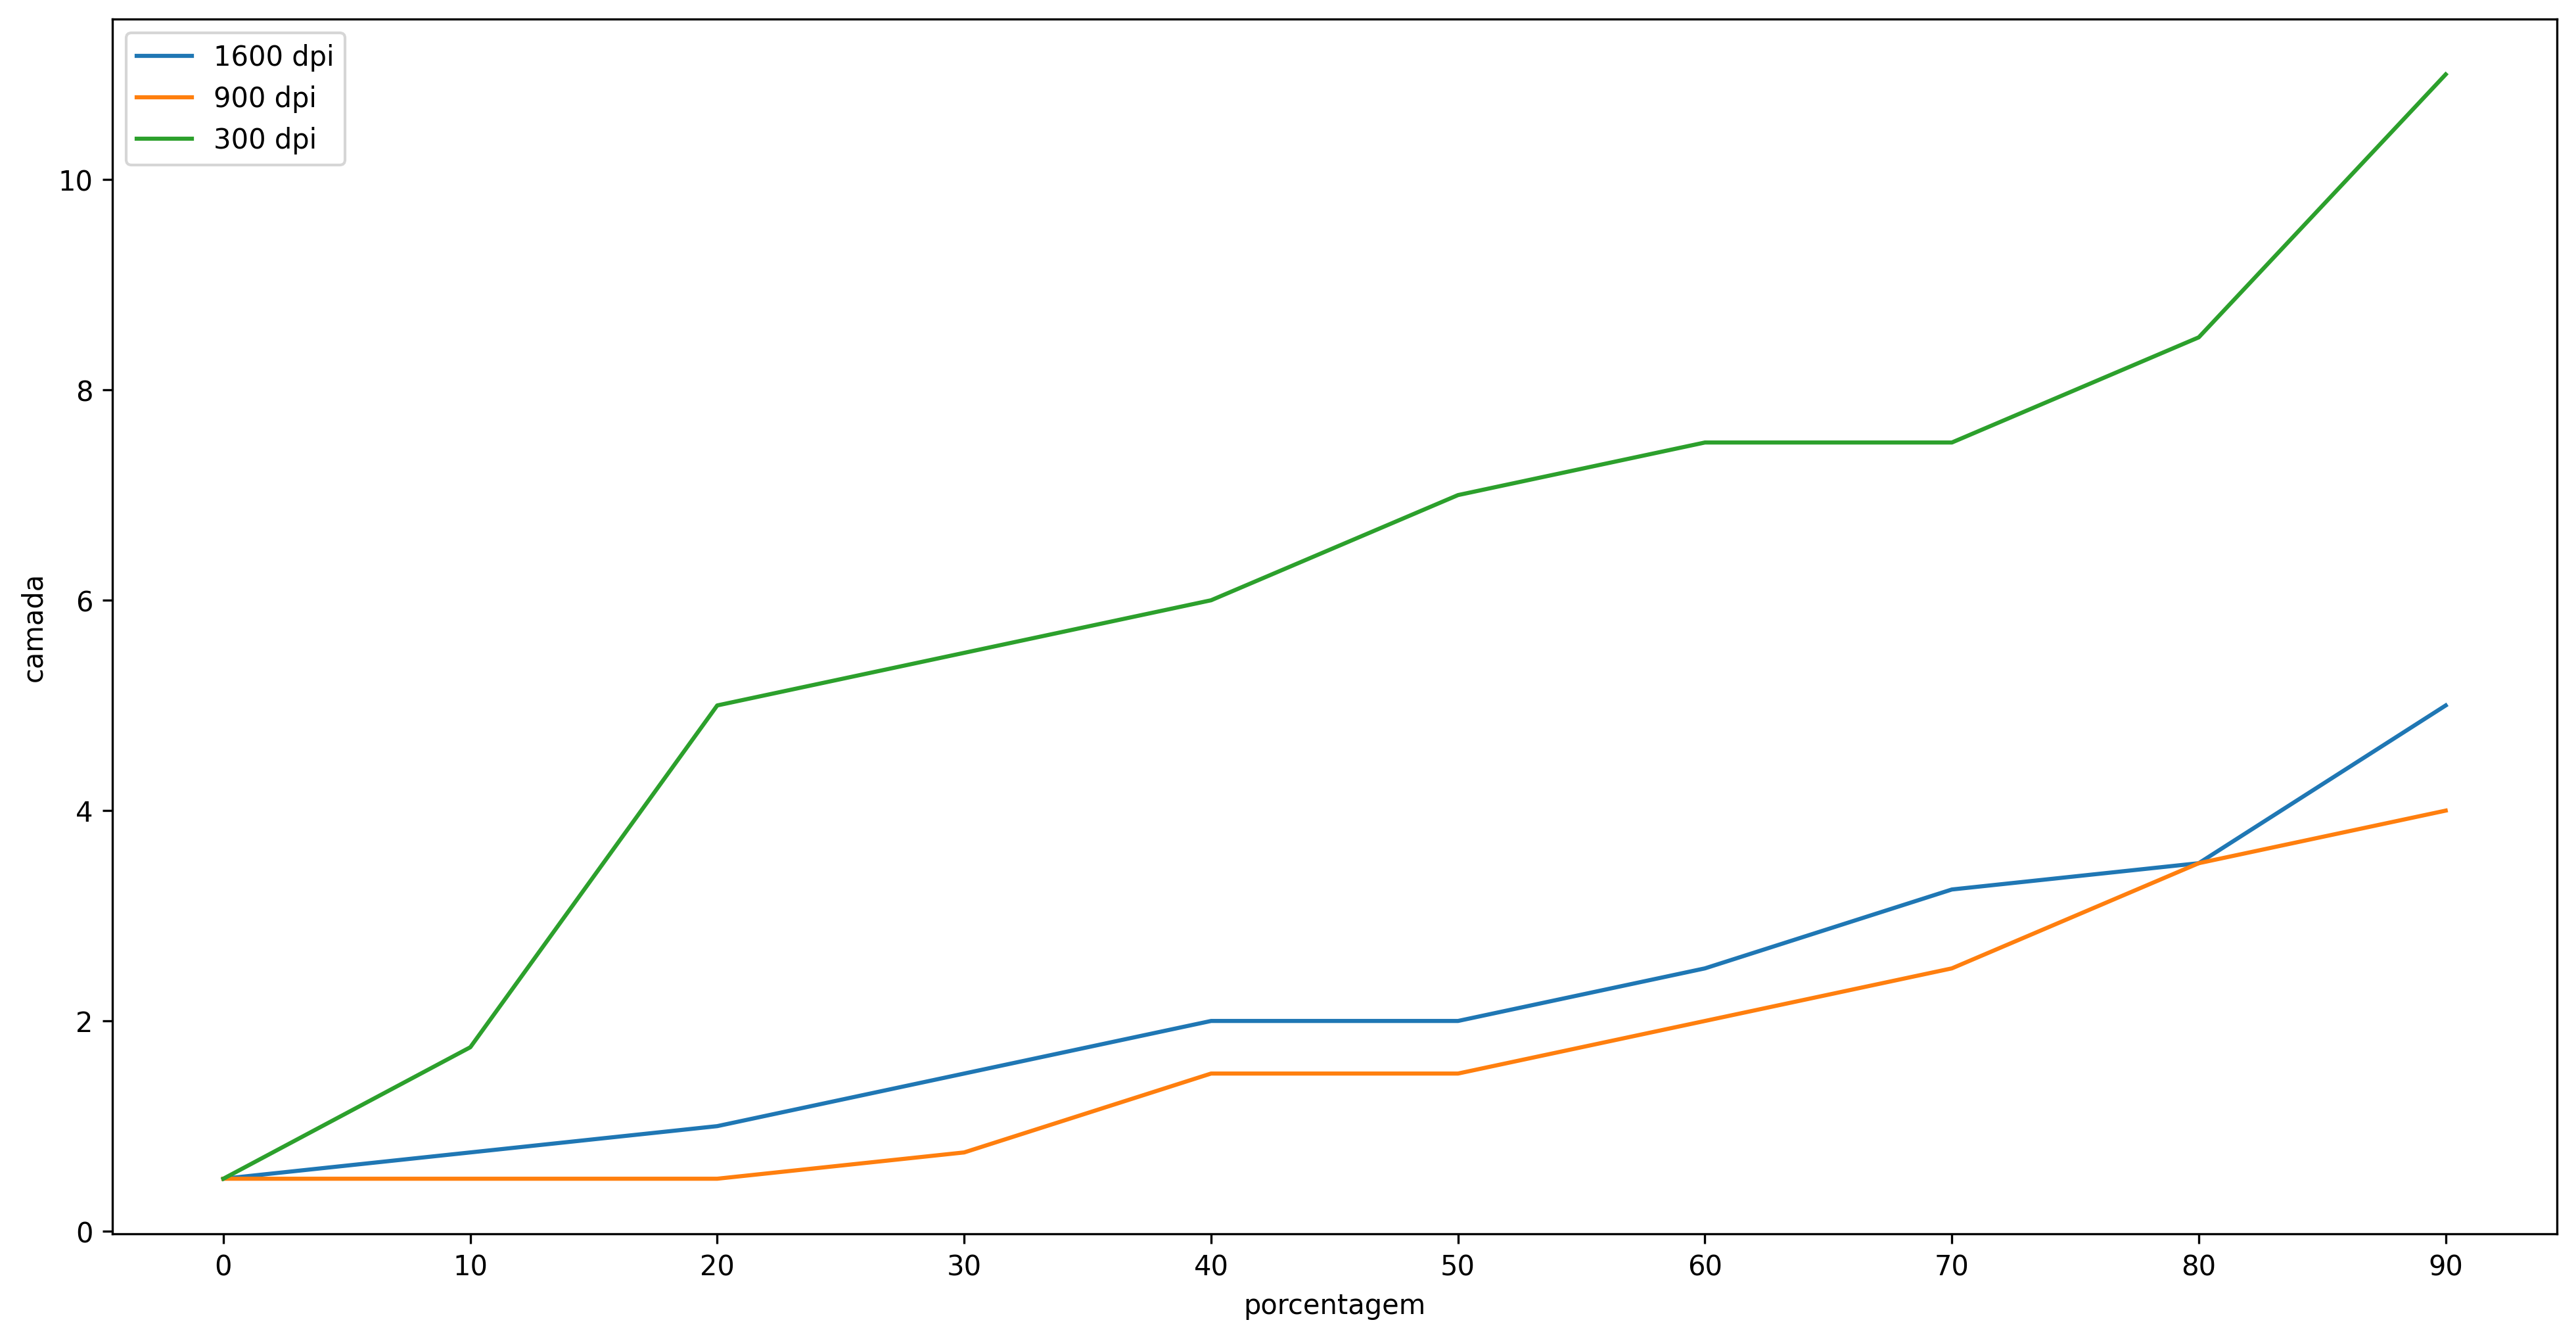

In [48]:
plot(df_1600, df_900, df_300)